In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression
import seaborn as sns

In [16]:
X, y, cof = make_regression(n_samples=500, n_features=1, bias=4.2, noise=7.1, coef=True)
print X.shape, y.shape, cof

(500, 1) (500,) 34.575859768297335


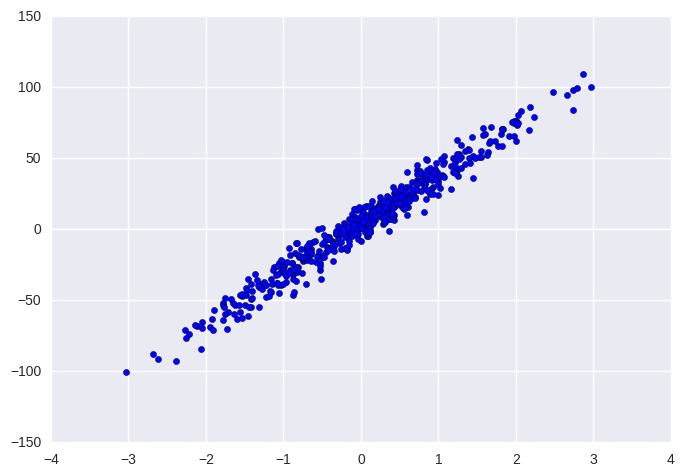

In [20]:
# plt.xlim(-200, 200)
# plt.ylim(-200, 200)
sns.plt.scatter(X[:, 0], y)


In [21]:
split = int(0.8 * X.shape[0])

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

(400, 1) (100, 1)
(400,) (100,)


In [23]:
# hypothesis function
def hypothesis(x, w):
    return x*w[1] + w[0]

# error compute
def get_error(y_true, x, w):
    err = 0.0
    
    # Get number of examples
    m = x.shape[0]
    for ix in range(m):
        # for each example compute the square error
        err += (y_true[ix] - hypothesis(x[ix], w))**2
    # Get mean sq. error
    err = err / (2*m)
    return err

# error gradient
def get_grads(y_true, x, w):
    grad_00 = 0.0
    grad_01 = 0.0
    
    # Get number of examples
    m = x.shape[0]
    
    for ix in range(m):
        # for each example compute the gradients
        grad_00 += (y_true[ix] - hypothesis(x[ix], w))*(-1)
        grad_01 += (y_true[ix] - hypothesis(x[ix], w))*(-1*x[ix])
    
    # Get mean grads
    grad_00 = grad_00 / m
    grad_01 = grad_01 / m
    return [grad_00, grad_01]

# update weights using grad. desc.
def grad_descent(x, y_true, w, learning_rate=0.1):
    error = get_error(y_true, x, w)
    [grad_00, grad_01] = get_grads(y_true, x, w)
    
    w[0] = w[0] - learning_rate*grad_00
    w[1] = w[1] - learning_rate*grad_01
    
    return error, w

In [248]:
W = np.array([0.1, 0.1])
loss = []

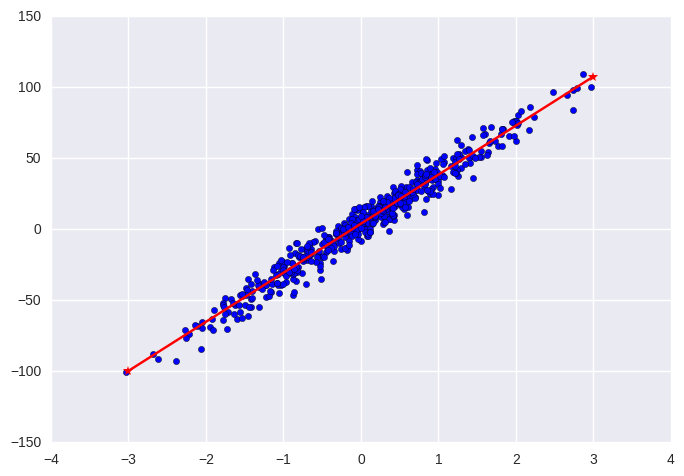

In [313]:
# for ix in range(100):

sns.plt.scatter(X[:, 0], y)

y_0 = hypothesis(-3, W)
y_1 = hypothesis(3, W)

plt.plot([-3, 3], [y_0, y_1], 'r*-')
plt.show()

l, W = grad_descent(X_train, y_train, W, learning_rate=0.02)
loss.append(l)

# print loss

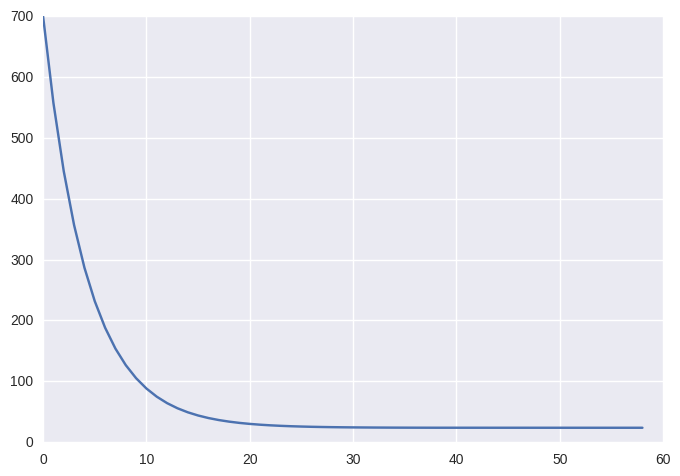

In [314]:
plt.plot(loss)
plt.show()

In [315]:
print W

[ 3.84698719 34.53120271]


In [316]:
from sklearn.linear_model import LinearRegression

In [317]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [318]:
lr.score(X_test, y_test)

0.966541252828746